In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme()

df = pd.read_csv('/Users/ruiqingfan/Documents/INDE-577-24/INDE-577-24-1/gender_voice.csv', delimiter=',')
df.dataframeName = 'gender voice.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

df.head(5)

There are 3168 rows and 21 columns


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


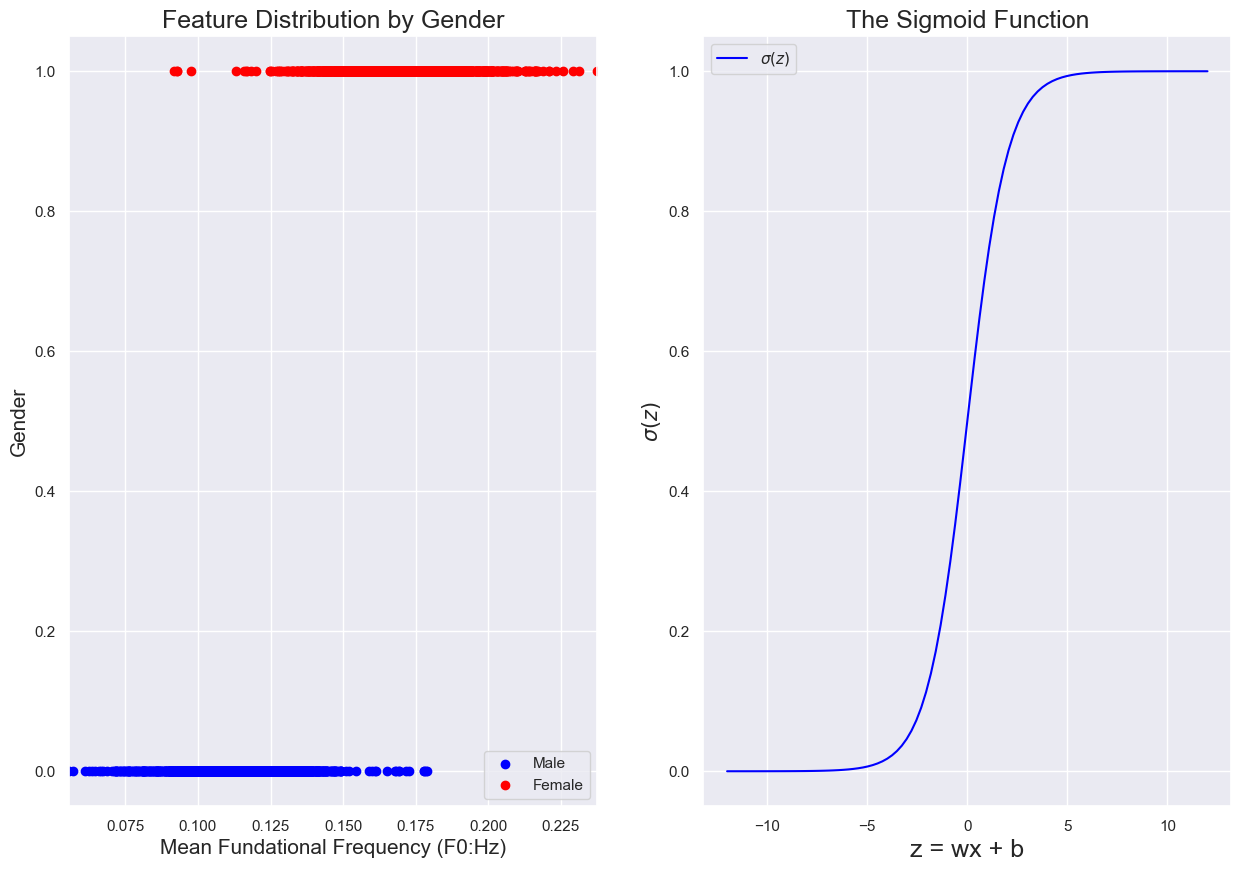

In [5]:
# Define the sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# For ax1, plot some feature against binary labels
# Assuming 'label' is binary where 1 = male, 0 = female (adjust according to your dataset)
ax1.set_xlim(df['meanfun'].min(), df['meanfun'].max())
ax1.scatter(df[df['label'] == 'male']['meanfun'], 
            np.zeros(df[df['label'] == 'male'].shape[0]), 
            color="blue", 
            label="Male")
ax1.scatter(df[df['label'] == 'female']['meanfun'], 
            np.ones(df[df['label'] == 'female'].shape[0]), 
            color="red", 
            label="Female")
ax1.set_xlabel("Mean Fundational Frequency (F0:Hz)", fontsize=15)
ax1.set_ylabel("Gender", fontsize=15)
ax1.set_title("Feature Distribution by Gender", fontsize=18)
ax1.legend()

# For ax2, plot the sigmoid function
domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
         sigmoid(domain), 
         color="blue", 
         label="$\sigma(z)$")
ax2.set_xlabel("z = wx + b", fontsize=18)
ax2.set_ylabel("$\sigma(z)$", fontsize=15)
ax2.set_title("The Sigmoid Function", fontsize=18)
plt.legend()

plt.show()

In [6]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function: callable, cost_function: callable):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.randn(1 + X.shape[1])
        
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [12]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[50:][["meanfun", "IQR"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()


AttributeError: 'SingleNeuron' object has no attribute 'errors_'

In [8]:
# Define the sigmoid activation function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(y_hat, y):
    # To avoid log(0) error, clip predictions
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
    return -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

In [9]:
node = SingleNeuron(sigmoid, cross_entropy_loss)

In [10]:
# Train the neuron
node.train(X, y, alpha=0.01, epochs=10000)

# Optionally plot the cost function over epochs
node.plot_cost_function()

AttributeError: 'SingleNeuron' object has no attribute 'errors_'